In [2]:
import pandas as pd

In [3]:
ch89dg = pd.read_csv('./cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('./cleaned_data_descriptive/ch89m.csv')
ch89pru = pd.read_csv('./cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('./cleaned_data/ch89q.csv')

In [6]:
ch89m.loc[ch89m.county.isna(), 'county'] = 'NA'

###### merge tables

In [8]:
mortality_list = pd.read_csv('./cleaned_data_descriptive/mortality_list.csv')
mortality_list

,Unnamed: 0,mortality_targets
0,0,m005_ALL35_69
1,1,m008_MEDICALc
2,2,m065_STROKEc
3,3,m023_ALLCAc
4,4,m059_ALLVASCc
5,5,m028_OESOPHCAc
6,6,m072_COPDc
7,7,m010_NONMEDc


In [9]:
m_targets = pd.read_csv('./cleaned_data_descriptive/mortality_list.csv')
m_targets = m_targets['mortality_targets']
list(m_targets.values)

['m005_ALL35_69',
 'm008_MEDICALc',
 'm065_STROKEc',
 'm023_ALLCAc',
 'm059_ALLVASCc',
 'm028_OESOPHCAc',
 'm072_COPDc',
 'm010_NONMEDc']

In [10]:
questions = pd.read_csv('./cleaned_data_descriptive/questions_list.csv')
questions = questions['question']
questions
m_targets = pd.read_csv('./cleaned_data_descriptive/mortality_list.csv')
m_targets = m_targets['mortality_targets']
dg_to_keep = ['d005','d006','d007','d008','d009', 
               'd012','d013','d014','d015','d016', 
               'd028','d029','d030','d031','d032','d033','d034','d035','d036', 
               'd037','d038','d039','d040', 
               'd041','d042','d043','d044','d045','d046', 
               'd047','d048','d049','d050','d051','d052', 
               'g001','g002','g003','g004','g005']
ch89q_model = ch89q.loc[:,list(questions) + ['county', 'sex', 'xiang'] ]
ch89dg_model = ch89dg.loc[:,list(dg_to_keep) + ['county', 'sex', 'xiang']]
ch89m_model = ch89m.loc[:,list(m_targets.values) + ['county', 'sex', 'xiang']] 

In [11]:
bat = pd.merge(ch89q_model, ch89dg_model, 
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])
bat = pd.merge(bat, ch89m_model,
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])
bat = pd.merge(bat, ch89pru,
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])


In [12]:
bat.shape

(621, 297)

In [13]:
bat

,q010,q015,q016,q022,q023,q024,q025,q037,q038,q039,...,u024,u025,u026,u027,u028,u029,u030,u031,u032,u033
0,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,...,1.87,12.76,13.66,0.26,3.10,1.03,8.82,NaN,NaN,NaN
1,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15.93,42.81,8.79,2.21,10.75,1.31,11.53,NaN,NaN,NaN
2,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,NaN,...,8.90,27.79,11.22,1.24,6.92,1.17,10.18,0.61,0.478,0.132
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,0.0,70.0,85.0,NaN,16.7,46.7,35.0,7149.0,142.0,2142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,0.0,70.0,85.0,NaN,28.3,58.3,11.7,7327.0,25.0,980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### clustering analysis

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
km = KMeans()
ss = StandardScaler()

In [16]:
ch89m_model.loc[ch89m_model['sex'] == 'T',]

,m005_ALL35_69,m008_MEDICALc,m065_STROKEc,m023_ALLCAc,m059_ALLVASCc,m028_OESOPHCAc,m072_COPDc,m010_NONMEDc,county,sex,xiang
2,11.29,10.45,157.90,4.44,2.06,114.56,228.61,84.64,AA,T,3
5,11.82,11.04,164.02,4.50,2.07,112.05,243.96,77.64,AB,T,3
8,10.55,9.98,128.56,3.92,1.79,92.98,270.48,57.57,AC,T,3
11,16.19,15.56,297.25,6.72,4.82,110.26,208.06,64.14,BA,T,3
14,13.59,12.69,323.79,5.17,4.63,129.27,138.69,89.74,BB,T,3
...,...,...,...,...,...,...,...,...,...,...,...
188,17.05,16.19,245.72,4.69,6.36,117.41,204.89,86.74,WB,T,3
191,13.29,12.59,173.89,2.27,4.16,68.34,270.10,70.61,WC,T,3
194,15.63,14.41,230.15,5.32,4.29,229.77,274.38,122.03,XA,T,3
197,18.88,17.63,223.03,4.96,3.88,314.56,353.98,125.30,XB,T,3


In [17]:
ch89m_model.loc[ch89m_model['sex'] == 'T',]['county']

2      AA
5      AB
8      AC
11     BA
14     BB
       ..
188    WB
191    WC
194    XA
197    XB
200    YA
Name: county, Length: 67, dtype: object

In [19]:
bat.shape

(621, 297)

In [20]:
bat_km = bat[(bat['sex'] == 'T') & (bat['xiang'] == 3)]
# bat_km.dropna(axis = 0, thresh=150)
# sum(bat_km.isna().sum().sort_values(ascending=False) <100)
bat_km.shape
bat_km.county
bat_km.isna().sum().sort_values(ascending=False).describe()
bat_km = bat_km.dropna(axis=1)
bat_km.isna().sum().describe()
bat_km.columns

Index(['q010', 'q015', 'q016', 'q022', 'q023', 'q024', 'q025', 'q037', 'q038',
       'q039',
       ...
       'r017', 'r018', 'r019', 'r020', 'r021', 'r022', 'r023', 'r024', 'r025',
       'r026'],
      dtype='object', length=193)

In [21]:
bat_km_sc = ss.fit_transform(bat_km.select_dtypes(exclude = 'object'))

In [22]:
km = KMeans(n_clusters=3)
km.fit(bat_km_sc)

KMeans(n_clusters=3)

In [23]:
km.cluster_centers_

array([[ 2.98553106e-01, -2.60910239e-01, -3.61417791e-01,
         2.40277388e-01,  3.44990038e-01, -6.49151458e-01,
         2.38597685e-01, -3.33817460e-01, -4.40834736e-01,
        -5.73175495e-01,  9.48930648e-02, -2.46326299e-01,
        -4.67505562e-01, -3.19325841e-01,  3.07232985e-02,
         1.02794202e-01, -3.98752876e-01,  8.26984846e-01,
         8.62755030e-01,  7.57665222e-01, -5.51670670e-01,
        -2.80294399e-01, -2.63967577e-01, -4.12354358e-01,
        -5.38730593e-03,  2.23679924e-01,  1.57620278e-01,
         2.80000547e-01,  3.30930194e-01, -1.02353152e-01,
        -1.03901158e-01, -3.04252290e-03, -3.46014851e-02,
         3.76225877e-01,  3.23564698e-01,  3.72053356e-01,
         4.33027074e-01,  4.35735070e-01, -1.22410454e-01,
         2.99344143e-01, -6.16835650e-03,  1.96092568e-01,
         5.35832482e-01,  2.17351667e-01,  2.73649360e-01,
         1.70474572e-01, -4.86041069e-01,  2.18952370e-02,
         1.85415972e-02, -3.61009230e-01, -4.59330866e-0

In [24]:
km.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int32)

In [25]:
from sklearn.metrics import silhouette_score


In [26]:
# code from GA lesson 39 k_means
scores = []

for k in range(2, 5):
    km = KMeans(n_clusters = k)
    km.fit(bat_km_sc)
    inertia = km.inertia_
    silhouette = silhouette_score(bat_km_sc, km.labels_)
    scores.append([k, inertia, silhouette])

score_df = pd.DataFrame(scores, columns = ['k', 'inertia', 'silhouette'])
score_df

,k,inertia,silhouette
0,2,11600.388242,0.115461
1,3,10679.748541,0.087072
2,4,9843.205912,0.108149


In [27]:
import numpy as np

In [28]:
# This code reads the text file with all the code descriptions as a single column and 
# will return a df. The last bits will match the imported text file to the features with an 
# importance > 0
# After the initial modeling:

with open('./data/CHNAME.txt', 'r') as file:
    data = file.read()
    rows = data.split('\n')

descriptions = pd.DataFrame(rows)

text_df = descriptions.iloc[::2,:]
text_df['code'] = text_df[0].str.split(expand=True).iloc[:,0]
text_df.rename(columns={0:'description'}, inplace=True)
text_df['code'] = text_df['code'].str.lower()
text_df

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_11110/1765311509.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['code'] = text_df[0].str.split(expand=True).iloc[:,0]
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_11110/1765311509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.rename(columns={0:'description'}, inplace=True)
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_11110/1765311509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,description,code
0,M001 ALL0-4 mortality ALL CAUSES AGE 0-4 (...,m001
2,M002 ALL5-14 mortality ALL CAUSES AGE 5-14 ...,m002
4,M003 ALL15-34 mortality ALL CAUSES AGE 15-34...,m003
6,M004 ALL0-34 mortality ALL CAUSES AGE 0-34 ...,m004
8,M005 ALL35-69 mortality ALL CAUSES AGE 35-69...,m005
...,...,...
1268,Q243 fWTadj questionnaire WEIGHT OF SCHOOL...,q243
1270,Q244 fHT questionnaire HEIGHT OF SCHOOL...,q244
1272,Q245 fHTadj questionnaire HEIGHT OF SCHOOL...,q245
1274,Q246 fBMI questionnaire WEIGHT/HEIGHT**2...,q246


k-means doesn't offer much of value here.

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan = DBSCAN(eps = 11, min_samples=2)
dbscan.fit(bat_km_sc)
silhouette_score(bat_km_sc, dbscan.labels_)
dbscan.labels_

array([-1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1,  1,  1, -1, -1, -1, -1, -1, -1,  2, -1,  2,
       -1, -1, -1, -1, -1, -1,  3, -1, -1,  3,  4, -1,  4, -1, -1, -1, -1,
       -1, -1, -1, -1,  5,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1])

In [31]:
list(bat_km.columns)

['q010',
 'q015',
 'q016',
 'q022',
 'q023',
 'q024',
 'q025',
 'q037',
 'q038',
 'q039',
 'q040',
 'q082',
 'q083',
 'q084',
 'q087',
 'q088',
 'q089',
 'q090',
 'q091',
 'q092',
 'q093',
 'q094',
 'q095',
 'q096',
 'q097',
 'q098',
 'q099',
 'q100',
 'q101',
 'q102',
 'q103',
 'q104',
 'q105',
 'q106',
 'q107',
 'q108',
 'q109',
 'q110',
 'q119',
 'q120',
 'q121',
 'q122',
 'q123',
 'q124',
 'q125',
 'q126',
 'q127',
 'q128',
 'q129',
 'q136',
 'q137',
 'q140',
 'q141',
 'q144',
 'q145',
 'q146',
 'q147',
 'q148',
 'q149',
 'q150',
 'q151',
 'q152',
 'q153',
 'q154',
 'q155',
 'q156',
 'q157',
 'q158',
 'q159',
 'q160',
 'q161',
 'q162',
 'q163',
 'q164',
 'q165',
 'q166',
 'q167',
 'q168',
 'q169',
 'q170',
 'q171',
 'q172',
 'q173',
 'q174',
 'q175',
 'q176',
 'q177',
 'sex',
 'xiang',
 'd005',
 'd006',
 'd007',
 'd008',
 'd009',
 'd012',
 'd013',
 'd014',
 'd015',
 'd016',
 'd028',
 'd029',
 'd030',
 'd031',
 'd032',
 'd033',
 'd034',
 'd035',
 'd036',
 'd037',
 'd038',
 'd039',
 

adjusting the eps parameter did not reveal anything useful. The best silhouette score for .24 was seen with min_samples = 1, eps = 18.  

spectral implementation from [source](https://www.youtube.com/watch?v=YHz0PHcuJnk)

In [32]:
from sklearn.preprocessing import normalize
from scipy import linalg
import matplotlib.pyplot as plt

In [33]:
U, sigma, _ = linalg.svd(bat_km_sc, full_matrices=False, lapack_driver='gesvd')

Usubset = U[:,0:2]
y_pred_sc = KMeans(n_clusters=2).fit_predict(normalize(Usubset))

y_pred_sc
# Usubset

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [34]:
silhouette_score(bat_km_sc,y_pred_sc)

0.11546123963885838

In [157]:
[col for col in bat.columns if col.startswith('m')]

['m005_ALL35_69',
 'm008_MEDICALc',
 'm065_STROKEc',
 'm023_ALLCAc',
 'm059_ALLVASCc',
 'm028_OESOPHCAc',
 'm072_COPDc',
 'm010_NONMEDc']

###### I'll look at correlations

In [147]:
mortalities = [col for col in bat.columns if col.startswith('m')]
mort_corr = pd.DataFrame()
abs_corr= bat.corr().abs()
for mor in mortalities:
    abs_corr.loc[[bat.corr().abs().index] :,mor].sort_values(ascending = False):
    

m005_ALL35_69     1.000000
m008_MEDICALc     0.994174
m065_STROKEc      0.661894
m023_ALLCAc       0.654656
m059_ALLVASCc     0.636779
q112              0.606668
m028_OESOPHCAc    0.591774
m010_NONMEDc      0.584551
m072_COPDc        0.583482
q129              0.567655
q128              0.562904
q111              0.551754
q141              0.515579
q090              0.510261
q136              0.487015
q154              0.455161
q189              0.446171
q137              0.436147
q023              0.428377
q103              0.414731
Name: m005_ALL35_69, dtype: float64

In [160]:
bat['q112'].isna().sum()

166

In [ ]:
bat['q112']

In [144]:
import seaborn as sns

In [158]:
sns.scatterplot(bat_km['q112'],bat_km['m005_ALL35_69'] ).set(title = 'Mortality from 35 to 69 by FVC', xlabel = 'Forced Vital Capacity (L)', 
                                                       ylabel = 'Mortality per 1,000')

KeyError: 'q112'

/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Oesophageal cancer from 35 to 69 by FVC'),
 Text(0.5, 0, 'Forced Vital Capacity (L)'),
 Text(0, 0.5, 'Mortality per 100,000')]

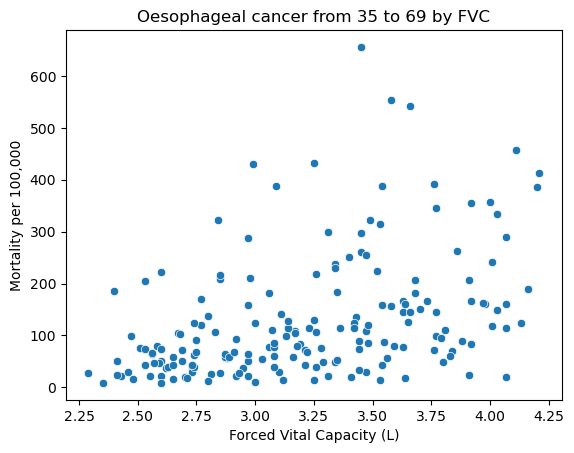

In [154]:
sns.scatterplot(bat['q112'],bat['m028_OESOPHCAc'] ).set(title = 'Oesophageal cancer from 35 to 69 by FVC',xlabel = 'Forced Vital Capacity (L)', 
                                                       ylabel = 'Mortality per 100,000')

In [ ]:
plt.plot(bat[
])

###### Principal Component Analysis

In [36]:
import numpy as np
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components = 10)

In [64]:
bat_predictors.shape

(69, 192)

In [70]:
bat_predictors = bat_km[[col for col in bat_km.columns if not col.startswith('m')]].select_dtypes(exclude = 'object')

In [71]:
bat_predictors.shape

(69, 192)

In [78]:
z_pred = pca.fit_transform(bat_predictors)

In [ ]:
z_

In [79]:
pca.explained_variance_

array([1170986.52172192,  922375.60933793,  312702.46625813,
        187416.12338887,  126613.59706219,   99713.76894588,
         52607.66904928,   28436.08853121,   23070.16260433,
         15389.70906332])

In [83]:
from sklearn.linear_model import LogisticRegressionCV

In [84]:
lr = LogisticRegressionCV()

In [113]:
Z_df = pd.DataFrame(z_pred)

In [114]:
Z_df

,0,1,2,3,4,5,6,7,8,9
0,1057.180171,-1531.932011,567.623623,-250.715392,1042.430534,10.723320,72.279224,67.278632,147.299898,114.766443
1,607.642702,-1433.121284,-117.699899,309.422667,601.171261,63.483420,-295.205706,-44.917021,284.778296,105.523753
2,-60.308067,-1213.154017,149.797054,-370.719153,919.556592,-82.544538,13.295270,-0.690093,35.653627,21.860627
3,-1363.417582,348.107468,-176.874795,-576.819087,-28.259225,578.140762,66.698293,-71.207856,80.676777,6.672653
4,-1587.033624,120.248834,82.625391,-760.347607,-276.994395,348.148529,102.193770,30.078145,38.768908,-259.584695
...,...,...,...,...,...,...,...,...,...,...
64,-514.315147,868.518076,1039.637726,223.099672,-84.590107,-97.872740,-228.082018,-352.665649,-28.717098,267.144433
65,1635.788212,974.434173,207.135152,-277.468690,-236.844065,639.724741,209.373471,-183.150189,-236.492600,-158.056583
66,387.558568,1212.436091,360.944207,576.803748,292.812047,-312.330207,224.353367,-110.271331,89.219491,-41.187639
67,-1574.918356,890.213872,1083.770610,315.215383,-152.063773,-235.933558,302.649978,-162.578725,-121.950167,434.905230


In [99]:
mort_df = bat[[col for col in bat.columns if  col.startswith('m')]].iloc[bat_km.index]

In [100]:
mort_df. columns

Index(['m005_ALL35_69', 'm008_MEDICALc', 'm065_STROKEc', 'm023_ALLCAc',
       'm059_ALLVASCc', 'm028_OESOPHCAc', 'm072_COPDc', 'm010_NONMEDc'],
      dtype='object')

In [ ]:
bat_km['m005_']

In [97]:
bat_km.index

Int64Index([  8,  17,  26,  35,  44,  53,  62,  71,  80,  89,  98, 107, 116,
            125, 134, 143, 152, 161, 170, 179, 188, 197, 206, 215, 224, 233,
            242, 251, 260, 269, 278, 287, 296, 305, 314, 323, 332, 341, 350,
            359, 368, 377, 386, 395, 404, 413, 422, 431, 440, 449, 458, 467,
            476, 485, 494, 503, 512, 521, 530, 539, 548, 557, 566, 575, 584,
            593, 602, 611, 620],
           dtype='int64')

In [108]:
m005 = mort_df['m005_ALL35_69'].fillna(np.mean(mort_df['m005_ALL35_69']))

In [116]:
m005.shape, Z_df.shape

((69,), (69, 10))

In [119]:
m005.values

array([11.29      , 11.82      , 10.55      , 16.19      , 13.59      ,
        9.58      , 15.32      , 14.55      , 10.84      , 10.        ,
       13.85      , 13.81      , 10.11      , 14.36      , 14.38      ,
       11.8       ,  9.45      , 16.75      , 17.7       , 15.8       ,
       11.34      ,  8.76      , 15.86      , 14.05      , 16.09      ,
       13.75      , 12.19      , 13.6       , 15.07      , 14.8       ,
       14.7       , 15.7       , 19.05      , 13.73      , 14.03272727,
        9.95      , 11.43      ,  9.82      , 15.89      , 23.45      ,
       11.96      , 11.4       , 10.93      , 10.65      , 13.9       ,
       15.96      , 11.74      , 18.12      , 14.19      , 16.75      ,
       16.26      , 17.21      , 14.13      , 22.25      ,  9.47      ,
       10.7       , 14.03272727, 14.74      , 14.03272727,  8.53      ,
       17.93      , 20.54      , 14.82      , 10.21      , 17.05      ,
       13.29      , 15.63      , 18.88      , 17.95      ])

In [121]:
Z_df

,0,1,2,3,4,5,6,7,8,9
0,1057.180171,-1531.932011,567.623623,-250.715392,1042.430534,10.723320,72.279224,67.278632,147.299898,114.766443
1,607.642702,-1433.121284,-117.699899,309.422667,601.171261,63.483420,-295.205706,-44.917021,284.778296,105.523753
2,-60.308067,-1213.154017,149.797054,-370.719153,919.556592,-82.544538,13.295270,-0.690093,35.653627,21.860627
3,-1363.417582,348.107468,-176.874795,-576.819087,-28.259225,578.140762,66.698293,-71.207856,80.676777,6.672653
4,-1587.033624,120.248834,82.625391,-760.347607,-276.994395,348.148529,102.193770,30.078145,38.768908,-259.584695
...,...,...,...,...,...,...,...,...,...,...
64,-514.315147,868.518076,1039.637726,223.099672,-84.590107,-97.872740,-228.082018,-352.665649,-28.717098,267.144433
65,1635.788212,974.434173,207.135152,-277.468690,-236.844065,639.724741,209.373471,-183.150189,-236.492600,-158.056583
66,387.558568,1212.436091,360.944207,576.803748,292.812047,-312.330207,224.353367,-110.271331,89.219491,-41.187639
67,-1574.918356,890.213872,1083.770610,315.215383,-152.063773,-235.933558,302.649978,-162.578725,-121.950167,434.905230


In [125]:
type(m005.values)

numpy.ndarray

In [123]:
Z_df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [132]:
from sklearn.linear_model import LassoCV

In [134]:
lasso = LassoCV()

In [131]:
p = m005.values/1_000
np.log(p/(1-p))

array([-4.47248368, -4.42607186, -4.54102337, -4.10703902, -4.28473786,
       -4.6384515 , -4.16315755, -4.2155074 , -4.5136131 , -4.59511985,
       -4.26552324, -4.26845607, -4.58406879, -4.22884461, -4.22743253,
       -4.42778557, -4.6522456 , -4.07246515, -4.01633212, -4.13181919,
       -4.46801419, -4.72876078, -4.12796795, -4.25098325, -4.11333647,
       -4.27287105, -4.39487443, -4.28399216, -4.17986456, -4.19821749,
       -4.20509867, -4.13827002, -3.94145439, -4.27434693, -4.2522309 ,
       -4.6001829 , -4.46001798, -4.61346562, -4.1260477 , -3.72915546,
       -4.41415543, -4.46267645, -4.50525381, -4.53148827, -4.26186893,
       -4.12158095, -4.43294401, -3.9924528 , -4.24092615, -4.07246515,
       -4.10265353, -4.04490486, -4.2452243 , -3.78291201, -4.65011125,
       -4.52675388, -4.2522309 , -4.20234068, -4.2522309 , -4.75559933,
       -4.0031873 , -3.86462719, -4.19684675, -4.57412517, -4.05440805,
       -4.3073643 , -4.1428097 , -3.95059162, -4.00205211])

In [140]:
Z_df

,0,1,2,3,4,5,6,7,8,9
0,1057.180171,-1531.932011,567.623623,-250.715392,1042.430534,10.723320,72.279224,67.278632,147.299898,114.766443
1,607.642702,-1433.121284,-117.699899,309.422667,601.171261,63.483420,-295.205706,-44.917021,284.778296,105.523753
2,-60.308067,-1213.154017,149.797054,-370.719153,919.556592,-82.544538,13.295270,-0.690093,35.653627,21.860627
3,-1363.417582,348.107468,-176.874795,-576.819087,-28.259225,578.140762,66.698293,-71.207856,80.676777,6.672653
4,-1587.033624,120.248834,82.625391,-760.347607,-276.994395,348.148529,102.193770,30.078145,38.768908,-259.584695
...,...,...,...,...,...,...,...,...,...,...
64,-514.315147,868.518076,1039.637726,223.099672,-84.590107,-97.872740,-228.082018,-352.665649,-28.717098,267.144433
65,1635.788212,974.434173,207.135152,-277.468690,-236.844065,639.724741,209.373471,-183.150189,-236.492600,-158.056583
66,387.558568,1212.436091,360.944207,576.803748,292.812047,-312.330207,224.353367,-110.271331,89.219491,-41.187639
67,-1574.918356,890.213872,1083.770610,315.215383,-152.063773,-235.933558,302.649978,-162.578725,-121.950167,434.905230


In [ ]:
lasso.predict()

In [138]:
lasso.fit(Z_df, np.log(p/(1-p)))

LassoCV()

In [148]:
Z_df

,0,1,2,3,4,5,6,7,8,9
0,1057.180171,-1531.932011,567.623623,-250.715392,1042.430534,10.723320,72.279224,67.278632,147.299898,114.766443
1,607.642702,-1433.121284,-117.699899,309.422667,601.171261,63.483420,-295.205706,-44.917021,284.778296,105.523753
2,-60.308067,-1213.154017,149.797054,-370.719153,919.556592,-82.544538,13.295270,-0.690093,35.653627,21.860627
3,-1363.417582,348.107468,-176.874795,-576.819087,-28.259225,578.140762,66.698293,-71.207856,80.676777,6.672653
4,-1587.033624,120.248834,82.625391,-760.347607,-276.994395,348.148529,102.193770,30.078145,38.768908,-259.584695
...,...,...,...,...,...,...,...,...,...,...
64,-514.315147,868.518076,1039.637726,223.099672,-84.590107,-97.872740,-228.082018,-352.665649,-28.717098,267.144433
65,1635.788212,974.434173,207.135152,-277.468690,-236.844065,639.724741,209.373471,-183.150189,-236.492600,-158.056583
66,387.558568,1212.436091,360.944207,576.803748,292.812047,-312.330207,224.353367,-110.271331,89.219491,-41.187639
67,-1574.918356,890.213872,1083.770610,315.215383,-152.063773,-235.933558,302.649978,-162.578725,-121.950167,434.905230


In [149]:
lasso.predict(Z_df)

array([-4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401, -4.27736401,
       -4.27736401, -4.27736401, -4.27736401, -4.27736401])

In [137]:
lasso.cv

In [128]:
m005.values.shape

(69,)